# Covid-19 Data Analysis

Motivating question: Is there any relationship between the spread of the coronavirus in a country and how happy people are living in that country?

### Import Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Modules are imported.")

Modules are imported.


## Task 2

### Task 2.1: Importing covid-19 dataset

There are three options for this
1. pip install covid package: https://pypi.org/project/covid/
2. using wget
3. using raw.githubusercontent.com/<br>
&emsp; https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-20-2020.csv<br>
&emsp; https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv

Use wget is you have a list of urls to download.  Sample code would look like:

```python
# url of the raw csv dataset
urls = [
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
]

[wget.download(url) for url in urls]
```

Once download complete, it should output like below and the 3 files should appear in your working directory.

```python
['time_series_covid19_confirmed_global.csv',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_recovered_global.csv']
```

We will just download the confirmed dataset from JHU

In [6]:
URL_DATASET = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [7]:
corona_dataset_csv = pd.read_csv(URL_DATASET)
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,853,853,853,853,854,854,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,118,130,138,140,142,148,155,166,172,176


In [8]:
corona_dataset_csv[corona_dataset_csv["Country/Region"] == "US"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,2023590,2048986,2074526,2094058,2114026,2137731,2163290,2191052,2222579,2255119


Let's check the shape of the dataframe

In [9]:
corona_dataset_csv.shape

(266, 155)

### Task 2.2 Delete the useless columns

In [11]:
df = corona_dataset_csv.drop(["Lat","Long"],axis=1)

In [12]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424
1,NaN,Albania,0,0,0,0,0,0,0,0,...,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,852,853,853,853,853,854,854,855,855,855
4,NaN,Angola,0,0,0,0,0,0,0,0,...,118,130,138,140,142,148,155,166,172,176


### Task 2.3 Aggregating the rows by country

In [13]:
corona_dataset_agg = df.groupby("Country/Region").sum()

In [14]:
corona_dataset_agg.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424
Albania,0,0,0,0,0,0,0,0,0,0,...,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891
Algeria,0,0,0,0,0,0,0,0,0,0,...,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631
Andorra,0,0,0,0,0,0,0,0,0,0,...,852,853,853,853,853,854,854,855,855,855
Angola,0,0,0,0,0,0,0,0,0,0,...,118,130,138,140,142,148,155,166,172,176
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,26
Argentina,0,0,0,0,0,0,0,0,0,0,...,27373,28764,30295,31577,32785,34159,35552,37510,39570,41204
Armenia,0,0,0,0,0,0,0,0,0,0,...,14669,15281,16004,16667,17064,17489,18033,18698,19157,19708
Australia,0,0,0,0,4,5,5,6,9,9,...,7289,7294,7320,7335,7347,7370,7391,7409,7411,7461


In [15]:
corona_dataset_agg.shape

(188, 151)

### Task 2.4 Visualizing data related to a county (China)

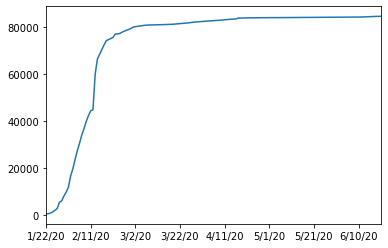

In [18]:
_ = corona_dataset_agg.loc["China"].plot()

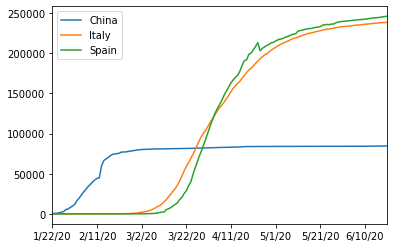

In [19]:
corona_dataset_agg.loc["China"].plot()
corona_dataset_agg.loc["Italy"].plot()
corona_dataset_agg.loc["Spain"].plot()
_ = plt.legend()

## Task 3: Calculating a good measure
Find a good measure to describe the spread of the virus in a country

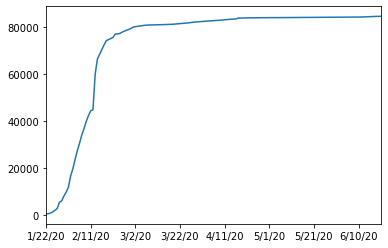

In [20]:
_ = corona_dataset_agg.loc["China"].plot()

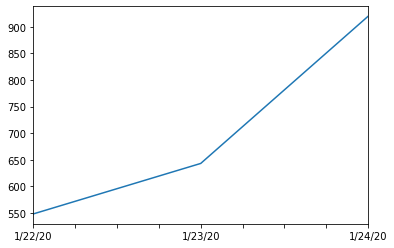

In [21]:
_ = corona_dataset_agg.loc["China"][:3].plot()

### Task 3.1 Calculating the first derivative of the curve

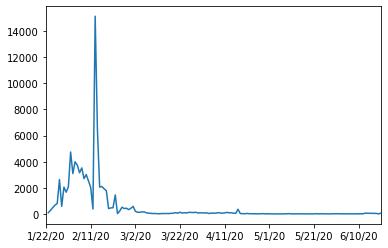

In [22]:
_ = corona_dataset_agg.loc["China"].diff().plot()

### Task 3.2 Find the maximum infection rate for China, Italy, Spain

Maximum number of new infected cases reported in 24 hours

In [23]:
corona_dataset_agg.loc["China"].diff().max()

15136.0

In [24]:
corona_dataset_agg.loc["Italy"].diff().max()

6557.0

In [25]:
corona_dataset_agg.loc["Spain"].diff().max()

9630.0

In [26]:
corona_dataset_agg.loc["US"].diff().max()

36291.0

### Task 3.3: Find the maximum infection rate for all countries

In [28]:
countries = list(corona_dataset_agg.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_dataset_agg.loc[c].diff().max())
corona_dataset_agg["max_infection_rate"] = max_infection_rates

In [29]:
corona_dataset_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,23546,24102,24766,25527,26310,26874,27532,27878,28424,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,1416,1464,1521,1590,1672,1722,1788,1838,1891,82.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,10698,10810,10919,11031,11147,11268,11385,11504,11631,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,853,853,853,853,854,854,855,855,855,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,130,138,140,142,148,155,166,172,176,17.0


### Task 3.4: Create a new dataframe with only needed column

In [30]:
corona_data = pd.DataFrame(corona_dataset_agg["max_infection_rate"])

In [31]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,82.0
Algeria,199.0
Andorra,79.0
Angola,17.0


## Task 4:
<ul>
    <li> import the WorldHappinessReport.csv dataset<\li>
    <li> select needed columns for anlysis <\li>
    <li> join datasets <\li>
    <li> calculate the correlations of our analysis <\li>
<\ul>    

### Task 4.1 Import world happiness dataset

In [32]:
happiness_report_csv = pd.read_csv("Datasets/worldwide_happiness_report.csv")

In [33]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [34]:
happiness_report_csv[happiness_report_csv["Country or region"] == "United States"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.28,0.128


In [35]:
happiness_report_csv[happiness_report_csv["Country or region"] == "New Zealand"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.33,0.38


### Task 4.2 drop useless columns

In [36]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [37]:
happiness_report_csv.drop(useless_cols,axis=1,inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3 change indicies of dataframe

In [47]:
happiness_report_csv.set_index("Country or region", inplace=True)

In [48]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [39]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,82.0
Algeria,199.0
Andorra,79.0
Angola,17.0


In [40]:
corona_data.shape

(188, 1)

In [50]:
happiness_report_csv.shape

(156, 4)

inner join the datasets

In [51]:
data = corona_data.join(happiness_report_csv,how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,82.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,2060.0,1.092,1.432,0.881,0.471
Armenia,766.0,0.850,1.055,0.815,0.283


### Task 4.5: correlation matrix

In [54]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.163982,0.128187,0.170346,0.042688
GDP per capita,0.163982,1.000000,0.757521,0.859431,0.394799
Social support,0.128187,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.170346,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.042688,0.394799,0.456317,0.423146,1.000000


## Task 5: Visualization of the results

### Task 5.1: Plot GDP vs maximum infection rate

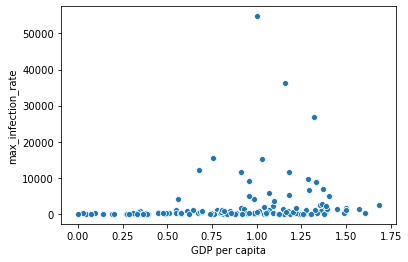

In [56]:
x = data["GDP per capita"]
y = data["max_infection_rate"]
_ = sns.scatterplot(x,y)

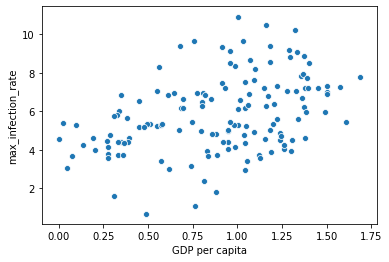

In [57]:
_ = sns.scatterplot(x,np.log(y))

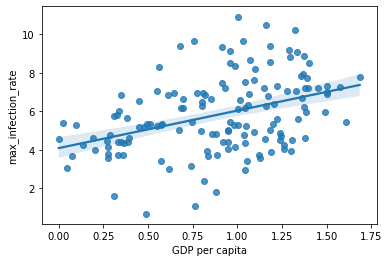

In [58]:
_ = sns.regplot(x,np.log(y))

### Task 5.2 Plot social support vs maximum infection rate

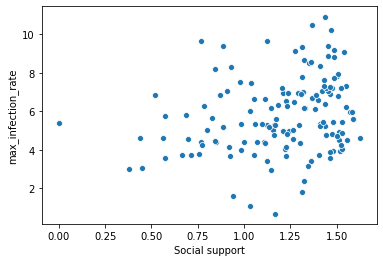

In [62]:
x = data["Social support"]
y = data["max_infection_rate"]
_ = sns.scatterplot(x,np.log(y))

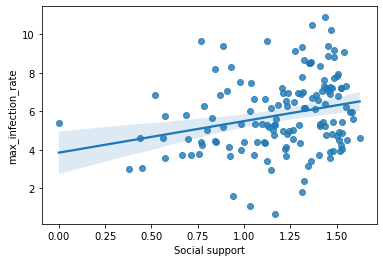

In [63]:
_ = sns.regplot(x,np.log(y))

### Task 5.3 Plot healthy life expectancy vs maximum infection rate

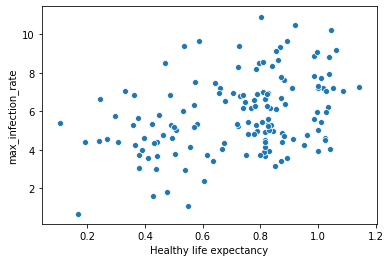

In [64]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]
_ = sns.scatterplot(x,np.log(y))

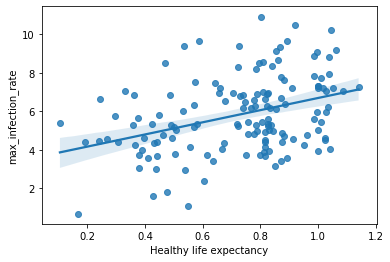

In [65]:
_ = sns.regplot(x,np.log(y))

### Task 5.4 Plot freedom to make life choices vs maximum infection rate

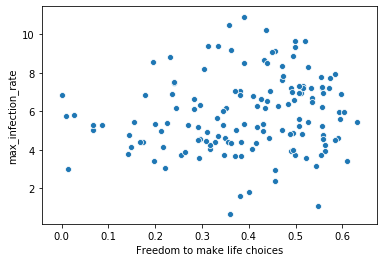

In [66]:
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]
_ = sns.scatterplot(x,np.log(y))

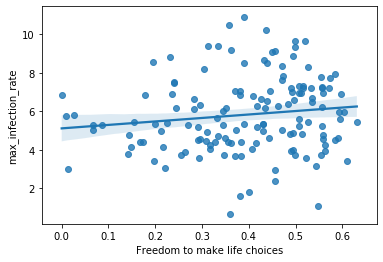

In [67]:
_ = sns.regplot(x,np.log(y))